Complete Animal Classifier Training Code
Using full TensorFlow module paths for compatibility
90 Different Animals Classification using Transfer Learning

Fixed Animal Classifier Training Pipeline
TensorFlow version: 2.16.1
NumPy version: 1.26.4
OpenCV version: 4.12.0
No GPU detected - using CPU

Fixed Training Configuration:
Image Size: 224x224
Batch Size: 16
Max Epochs: 60
Learning Rate: 0.0001 (reduced for stability)
Classes: 90
Starting Fixed Animal Classifier Training
This version addresses the 2% accuracy issue

Starting Fixed Training Pipeline

Dataset Verification
Found 90 animal classes
Sample class counts:
  antelope: 60 images
  badger: 60 images
  bat: 60 images
  bear: 60 images
  bee: 60 images
Dataset structure looks good!

Creating Data Generators
Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Training samples: 4320
Validation samples: 1080
Classes found: 90
Sample batch shape: (16, 224, 224, 3)
Sample labels shape: (16, 90)
Pixel value range: 0.000 to 1.000
Label sum check: 1.000 (should be 1.0)

Creating Simplified Model Architecture
Frozen layers: 50
Trainable layers: 188
Model ar

Traceback (most recent call last):
  File "C:\Users\Mario\AppData\Local\Temp\ipykernel_12364\2920378063.py", line 480, in main
    plot_training_history_fixed(history)
  File "C:\Users\Mario\AppData\Local\Temp\ipykernel_12364\2920378063.py", line 385, in plot_training_history_fixed
    ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
  File "c:\Users\Mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py", line 1779, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_base.py", line 296, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "c:\Users\Mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_base.py", line 486, in _plot_args
    raise ValueError(f"x and y must have same first dime

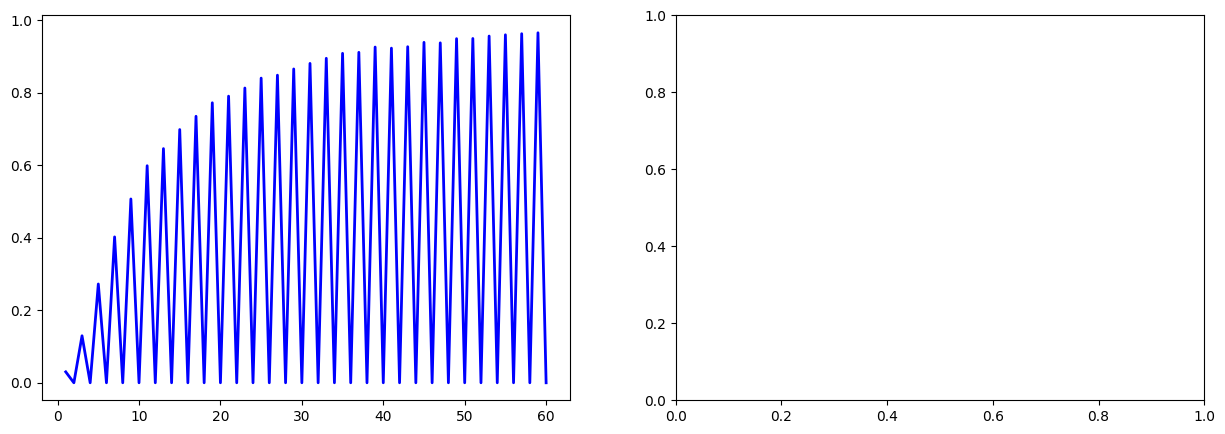

In [11]:
# Fixed Animal Classifier Training Code
# Addresses the learning issues (0.02% accuracy problem)
# 90 Different Animals Classification using Transfer Learning

# ====================================================================
# ENVIRONMENT SETUP AND IMPORTS
# ====================================================================

# Suppress warnings first
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import json

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow with full module paths
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

# Image processing
import cv2

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Fixed Animal Classifier Training Pipeline")
print("=" * 50)
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"OpenCV version: {cv2.__version__}")

# ====================================================================
# GPU CONFIGURATION (FIXED)
# ====================================================================

# Check and configure GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU Available: {len(gpus)} GPU(s) detected")
    try:
        # Configure GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth configured")
        
        # REMOVED MIXED PRECISION - This was causing the learning issues
        # Mixed precision can cause gradient underflow with small learning rates
        print("Mixed precision disabled for stability")
        
    except RuntimeError as e:
        print(f"GPU configuration note: {e}")
else:
    print("No GPU detected - using CPU")

# ====================================================================
# CONFIGURATION (FIXED PARAMETERS)
# ====================================================================

# Animal classes list (90 classes)
ANIMAL_CLASSES = [
    'antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat',
    'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin',
    'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish',
    'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird',
    'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito',
    'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda',
    'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer',
    'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel',
    'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'
]

# FIXED Training configuration
CONFIG = {
    'IMG_SIZE': 224,
    'BATCH_SIZE': 32 if gpus else 16,
    'EPOCHS': 60,
    'LEARNING_RATE': 0.0001,  # REDUCED from 0.001 - this was too high
    'NUM_CLASSES': len(ANIMAL_CLASSES),
    'DATA_PATH': 'animals',
    'MODEL_SAVE_PATH': 'animal_classifier_model.keras',  # FIXED to .keras format
    'VALIDATION_SPLIT': 0.2
}

print(f"\nFixed Training Configuration:")
print(f"Image Size: {CONFIG['IMG_SIZE']}x{CONFIG['IMG_SIZE']}")
print(f"Batch Size: {CONFIG['BATCH_SIZE']}")
print(f"Max Epochs: {CONFIG['EPOCHS']}")
print(f"Learning Rate: {CONFIG['LEARNING_RATE']} (reduced for stability)")
print(f"Classes: {CONFIG['NUM_CLASSES']}")

# ====================================================================
# DATASET VERIFICATION
# ====================================================================

def verify_dataset():
    """Verify dataset structure and provide diagnostics"""
    
    print("\nDataset Verification")
    print("=" * 30)
    
    dataset_path = Path(CONFIG['DATA_PATH'])
    
    if not dataset_path.exists():
        print(f"ERROR: Dataset directory '{dataset_path}' not found!")
        return False
    
    # Get all subdirectories (animal classes)
    subdirs = [d for d in dataset_path.iterdir() if d.is_dir()]
    print(f"Found {len(subdirs)} animal classes")
    
    # Count sample images
    total_images = 0
    class_counts = {}
    
    for class_dir in subdirs[:10]:
        image_files = [f for f in class_dir.iterdir() 
                      if f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]
        class_counts[class_dir.name] = len(image_files)
        total_images += len(image_files)
    
    print(f"Sample class counts:")
    for class_name, count in list(class_counts.items())[:5]:
        print(f"  {class_name}: {count} images")
    
    if total_images > 0:
        print("Dataset structure looks good!")
        return True
    else:
        print("ERROR: No images found in dataset")
        return False

# ====================================================================
# DATA GENERATORS (WITH DEBUG)
# ====================================================================

def create_data_generators():
    """Create data generators with debugging"""
    
    print("\nCreating Data Generators")
    print("=" * 35)
    
    # Training data augmentation
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,      # REDUCED augmentation to avoid confusing the model
        width_shift_range=0.1,  # REDUCED
        height_shift_range=0.1, # REDUCED
        shear_range=0.1,        # REDUCED
        zoom_range=0.1,         # REDUCED
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=CONFIG['VALIDATION_SPLIT']
    )
    
    # Validation data (no augmentation)
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=CONFIG['VALIDATION_SPLIT']
    )
    
    try:
        train_generator = train_datagen.flow_from_directory(
            CONFIG['DATA_PATH'],
            target_size=(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE']),
            batch_size=CONFIG['BATCH_SIZE'],
            class_mode='categorical',
            subset='training',
            shuffle=True,
            seed=42
        )
        
        val_generator = val_datagen.flow_from_directory(
            CONFIG['DATA_PATH'],
            target_size=(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE']),
            batch_size=CONFIG['BATCH_SIZE'],
            class_mode='categorical',
            subset='validation',
            shuffle=False,
            seed=42
        )
        
        print(f"Training samples: {train_generator.samples}")
        print(f"Validation samples: {val_generator.samples}")
        print(f"Classes found: {train_generator.num_classes}")
        
        # DEBUG: Check data integrity
        sample_batch = next(train_generator)
        print(f"Sample batch shape: {sample_batch[0].shape}")
        print(f"Sample labels shape: {sample_batch[1].shape}")
        print(f"Pixel value range: {sample_batch[0].min():.3f} to {sample_batch[0].max():.3f}")
        print(f"Label sum check: {sample_batch[1][0].sum():.3f} (should be 1.0)")
        
        # Reset generator after sampling
        train_generator.reset()
        
        return train_generator, val_generator
        
    except Exception as e:
        print(f"ERROR creating data generators: {e}")
        return None, None

# ====================================================================
# SIMPLIFIED MODEL (FIXED ARCHITECTURE)
# ====================================================================

def create_working_model():
    """Create a simpler, more stable model architecture"""
    
    print("\nCreating Simplified Model Architecture")
    print("=" * 50)
    
    # Load pre-trained EfficientNetB0 - but with simpler approach
    base_model = tf.keras.applications.EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE'], 3)
    )
    
    # IMPORTANT: Don't freeze initially - let it adapt from the start
    base_model.trainable = True
    
    # Freeze only the first few layers (keep more layers trainable)
    for layer in base_model.layers[:50]:  # Freeze first 50 layers only
        layer.trainable = False
    
    print(f"Frozen layers: {sum([not layer.trainable for layer in base_model.layers])}")
    print(f"Trainable layers: {sum([layer.trainable for layer in base_model.layers])}")
    
    # Create model with simpler head
    inputs = tf.keras.Input(shape=(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE'], 3))
    x = base_model(inputs, training=True)  # Always use training=True
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)  # Reduced dropout
    x = tf.keras.layers.Dense(256, activation='relu')(x)  # Smaller dense layer
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(CONFIG['NUM_CLASSES'], activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    # FIXED: Use standard Adam optimizer with lower learning rate
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=CONFIG['LEARNING_RATE'],
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    )
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', 'top_k_categorical_accuracy']
    )
    
    print("Model architecture created:")
    print(f"Total parameters: {model.count_params():,}")
    trainable_params = sum([tf.keras.backend.count_params(p) for p in model.trainable_weights])
    print(f"Trainable parameters: {trainable_params:,}")
    
    return model

# ====================================================================
# FIXED CALLBACKS
# ====================================================================

def setup_fixed_callbacks():
    """Setup training callbacks with more lenient settings"""
    
    callbacks = [
        # More patient early stopping
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',  # CHANGED: Monitor accuracy instead of loss
            patience=15,             # INCREASED patience
            restore_best_weights=True,
            verbose=1,
            mode='max'               # CHANGED to max for accuracy
        ),
        
        # More aggressive learning rate reduction
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',  # CHANGED: Monitor accuracy
            factor=0.5,              # CHANGED: More aggressive reduction
            patience=7,              # INCREASED patience
            min_lr=1e-8,
            verbose=1,
            mode='max'
        ),
        
        # Save best model
        tf.keras.callbacks.ModelCheckpoint(
            CONFIG['MODEL_SAVE_PATH'],
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False,
            verbose=1,
            mode='max'
        )
    ]
    
    return callbacks

# ====================================================================
# SIMPLIFIED TRAINING PIPELINE
# ====================================================================

def train_model_fixed():
    """Simplified single-phase training"""
    
    print("\nStarting Fixed Training Pipeline")
    print("=" * 45)
    
    # Verify dataset
    if not verify_dataset():
        print("Dataset verification failed.")
        return None, None, None
    
    # Create data generators
    train_gen, val_gen = create_data_generators()
    if train_gen is None:
        print("Failed to create data generators.")
        return None, None, None
    
    # Create model
    model = create_working_model()
    
    # Setup callbacks
    callbacks = setup_fixed_callbacks()
    
    # SINGLE PHASE TRAINING - More stable approach
    print("\n" + "="*60)
    print("TRAINING: Single phase with partial transfer learning")
    print("="*60)
    
    start_time = time.time()
    
    history = model.fit(
        train_gen,
        epochs=CONFIG['EPOCHS'],
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1,
        steps_per_epoch=len(train_gen),
        validation_steps=len(val_gen)
    )
    
    total_time = time.time() - start_time
    print(f"\nTotal training time: {total_time/60:.1f} minutes")
    
    return model, history, train_gen.class_indices

# ====================================================================
# VISUALIZATION
# ====================================================================

def plot_training_history_fixed(history):
    """Plot training history"""
    
    print("\nPlotting Training History")
    print("=" * 35)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    ax1.plot(epochs, acc, 'b-', label='Training Accuracy', linewidth=2)
    ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Loss plot
    ax2.plot(epochs, loss, 'b-', label='Training Loss', linewidth=2)
    ax2.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print(f"\nFinal Metrics:")
    print(f"Training Accuracy: {acc[-1]:.4f}")
    print(f"Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Training Loss: {loss[-1]:.4f}")
    print(f"Validation Loss: {val_loss[-1]:.4f}")

def evaluate_model_fixed(model, class_indices):
    """Quick model evaluation"""
    
    print("\nModel Evaluation")
    print("=" * 25)
    
    # Create test generator
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        CONFIG['DATA_PATH'],
        target_size=(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE']),
        batch_size=CONFIG['BATCH_SIZE'],
        class_mode='categorical',
        shuffle=False
    )
    
    print(f"Evaluating on {test_generator.samples} samples...")
    
    # Get evaluation metrics
    evaluation = model.evaluate(test_generator, verbose=1)
    print(f"Test Accuracy: {evaluation[1]:.4f}")
    
    if len(evaluation) > 2:
        print(f"Top-5 Accuracy: {evaluation[2]:.4f}")
    
    return evaluation

def save_model_artifacts_fixed(class_indices):
    """Save model artifacts"""
    
    print("\nSaving Model Artifacts")
    print("=" * 30)
    
    # Save class mappings
    np.save('class_indices.npy', class_indices)
    
    # Create reverse mapping
    idx_to_class = {v: k for k, v in class_indices.items()}
    np.save('idx_to_class.npy', idx_to_class)
    
    # Save configuration
    with open('training_config.json', 'w') as f:
        json.dump(CONFIG, f, indent=2)
    
    print("Saved files:")
    print(f"  {CONFIG['MODEL_SAVE_PATH']} - Trained model")
    print(f"  class_indices.npy - Class mappings")
    print(f"  training_config.json - Training configuration")

# ====================================================================
# MAIN EXECUTION
# ====================================================================

def main():
    """Main training execution with fixes"""
    
    print("Starting Fixed Animal Classifier Training")
    print("This version addresses the 2% accuracy issue")
    print("=" * 60)
    
    try:
        # Train the model
        model, history, class_indices = train_model_fixed()
        
        if model is None:
            print("Training failed. Please check your dataset.")
            return
        
        # Plot training history
        plot_training_history_fixed(history)
        
        # Evaluate model
        evaluation = evaluate_model_fixed(model, class_indices)
        
        # Save artifacts
        save_model_artifacts_fixed(class_indices)
        
        print("\n" + "="*60)
        print("TRAINING COMPLETED!")
        print("="*60)
        
        final_acc = history.history['val_accuracy'][-1]
        if final_acc > 0.7:
            print(f"SUCCESS: Final validation accuracy: {final_acc:.1%}")
            print("Model should now work well in the GUI!")
        elif final_acc > 0.3:
            print(f"PARTIAL SUCCESS: Final validation accuracy: {final_acc:.1%}")
            print("Model is learning but may need more training time")
        else:
            print(f"ISSUE: Final validation accuracy: {final_acc:.1%}")
            print("Model still not learning well - check data preprocessing")
        
        print(f"Model saved as: {CONFIG['MODEL_SAVE_PATH']}")
        
    except KeyboardInterrupt:
        print("\nTraining interrupted by user")
    except Exception as e:
        print(f"\nTraining failed with error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()